In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
df = pd.read_csv('ex2data1.txt', names=['Exam 1', 'Exam 2', 'Admitted'])

df.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
positive = df[df.Admitted == 1]
negative = df[df.Admitted == 0]

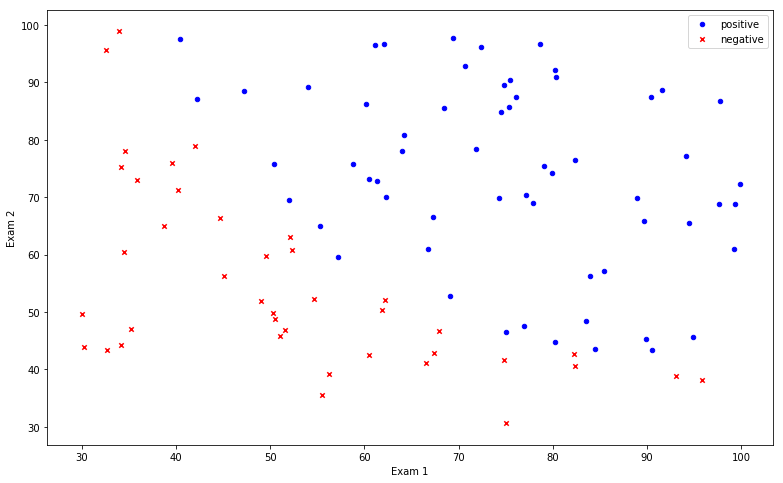

In [5]:
plt.figure(figsize=(13, 8))
plt.scatter(positive['Exam 1'], positive['Exam 2'], s=20, c='b', marker='o', label='positive')
plt.scatter(negative['Exam 1'], negative['Exam 2'], s=20, c='r', marker='x', label='negative')
plt.legend()
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

In [6]:
X_total = df.iloc[:, :-1]
Y_total = df.iloc[:, -1]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_total.values, Y_total.values)

In [8]:
Y_train[:4]

array([1, 0, 1, 0])

In [14]:
X_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [19]:
classifier = LogisticRegression(max_iter=2000, verbose=True)

In [20]:
classifier.fit(X_train, Y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=True, warm_start=False)

In [21]:
classifier.score(X_train, Y_train)

0.8933333333333333

In [22]:
classifier.score(X_test, Y_test)

0.88

In [24]:
scores = cross_val_score(classifier, X_train, Y_train, cv=4)

[LibLinear][LibLinear][LibLinear][LibLinear]

In [25]:
scores

array([0.9       , 0.94736842, 0.83333333, 0.83333333])